# Voting

## Load and inspect data

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [384]:
voting_train = pd.read_csv('datasets/train_CongressionalVoting.csv')
voting_test = pd.read_csv('datasets/test_CongressionalVoting.csv')

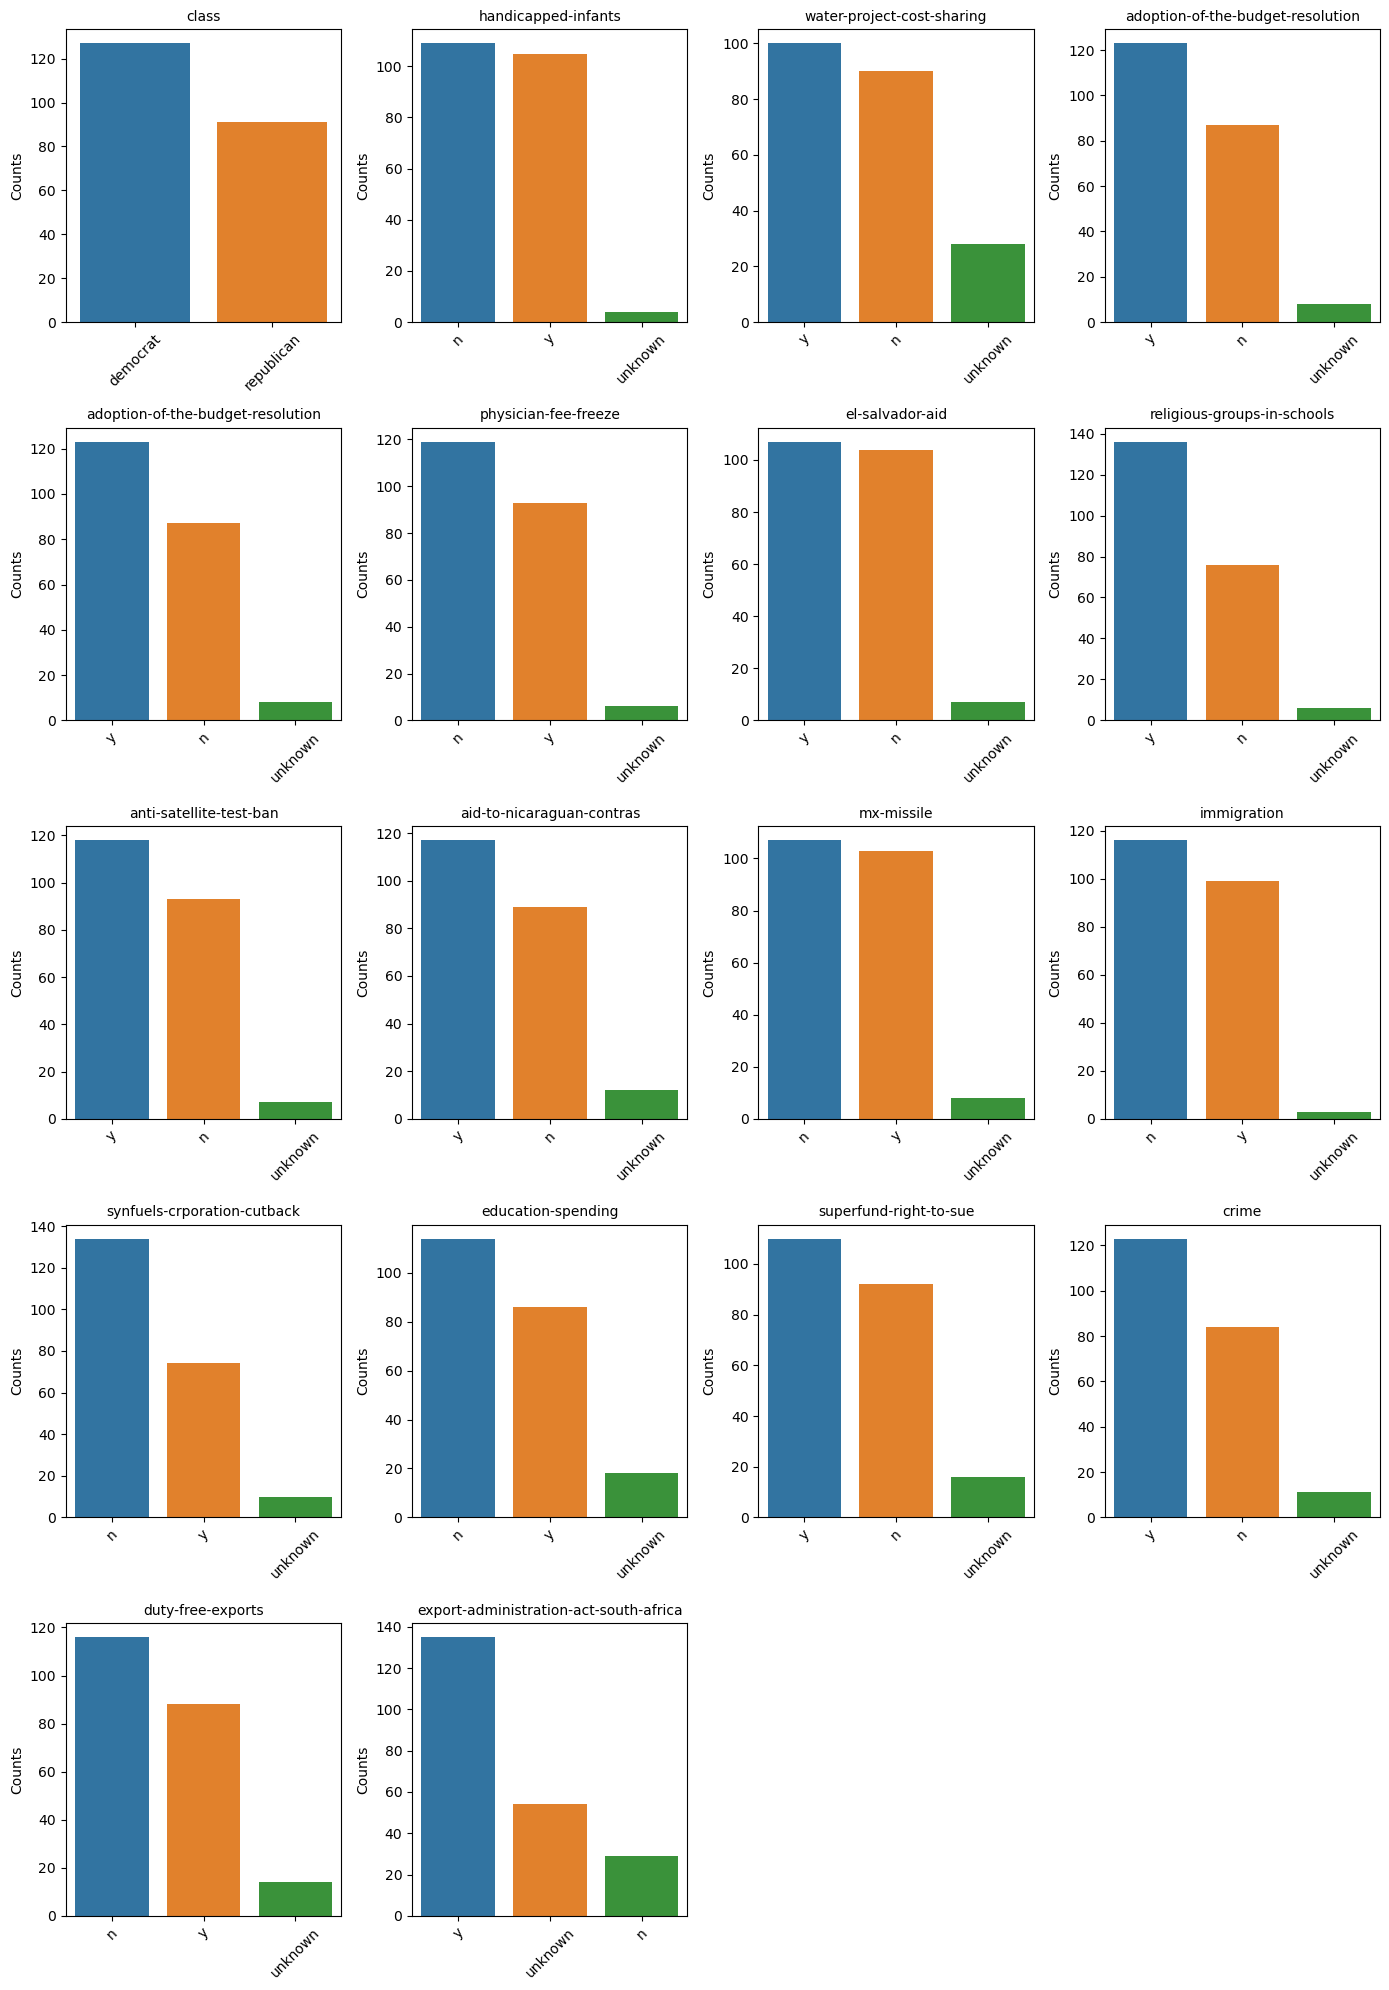

In [385]:
categorical_columns = ['class', "handicapped-infants", 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'adoption-of-the-budget-resolution', 
                       'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
                       'immigration', 'synfuels-crporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'
                      ]
plot_categorical_distributions(voting_train, categorical_columns)

In [386]:
unknown_counts = voting_train.apply(lambda row: row.tolist().count('unknown'), axis=1)

In [387]:
unknown_counts.sort_values(ascending=False)

72     16
214    15
102     7
65      6
18      6
       ..
128     0
127     0
126     0
125     0
217     0
Length: 218, dtype: int64

In [388]:
voting_train.iloc[72]
voting_train.iloc[214] # not useful rows

ID                                             184
class                                     democrat
handicapped-infants                        unknown
water-project-cost-sharing                 unknown
adoption-of-the-budget-resolution          unknown
physician-fee-freeze                       unknown
el-salvador-aid                            unknown
religious-groups-in-schools                unknown
anti-satellite-test-ban                    unknown
aid-to-nicaraguan-contras                  unknown
mx-missile                                       y
immigration                                unknown
synfuels-crporation-cutback                unknown
education-spending                         unknown
superfund-right-to-sue                     unknown
crime                                      unknown
duty-free-exports                          unknown
export-administration-act-south-africa     unknown
Name: 214, dtype: object

In [389]:
# Drop in the train set:
voting_train.drop(214, inplace=True) # drop out unuseful rows
voting_train.drop(72, inplace=True)
voting_train.drop("ID", axis=1, inplace=True) # drop ID column, not useful


# Drop the same rows in the test set:
voting_test.drop(214, inplace=True) # drop out unuseful rows
voting_test.drop(72, inplace=True)
voting_test.drop("ID", axis=1, inplace=True) # drop ID column, not useful

voting_train.apply(lambda row: row.tolist().count('unknown'), axis=1).sort_values(ascending=False)

102    7
18     6
65     6
118    5
138    5
      ..
128    0
127    0
126    0
125    0
217    0
Length: 216, dtype: int64

## Inspect the feature distribution of the democrates

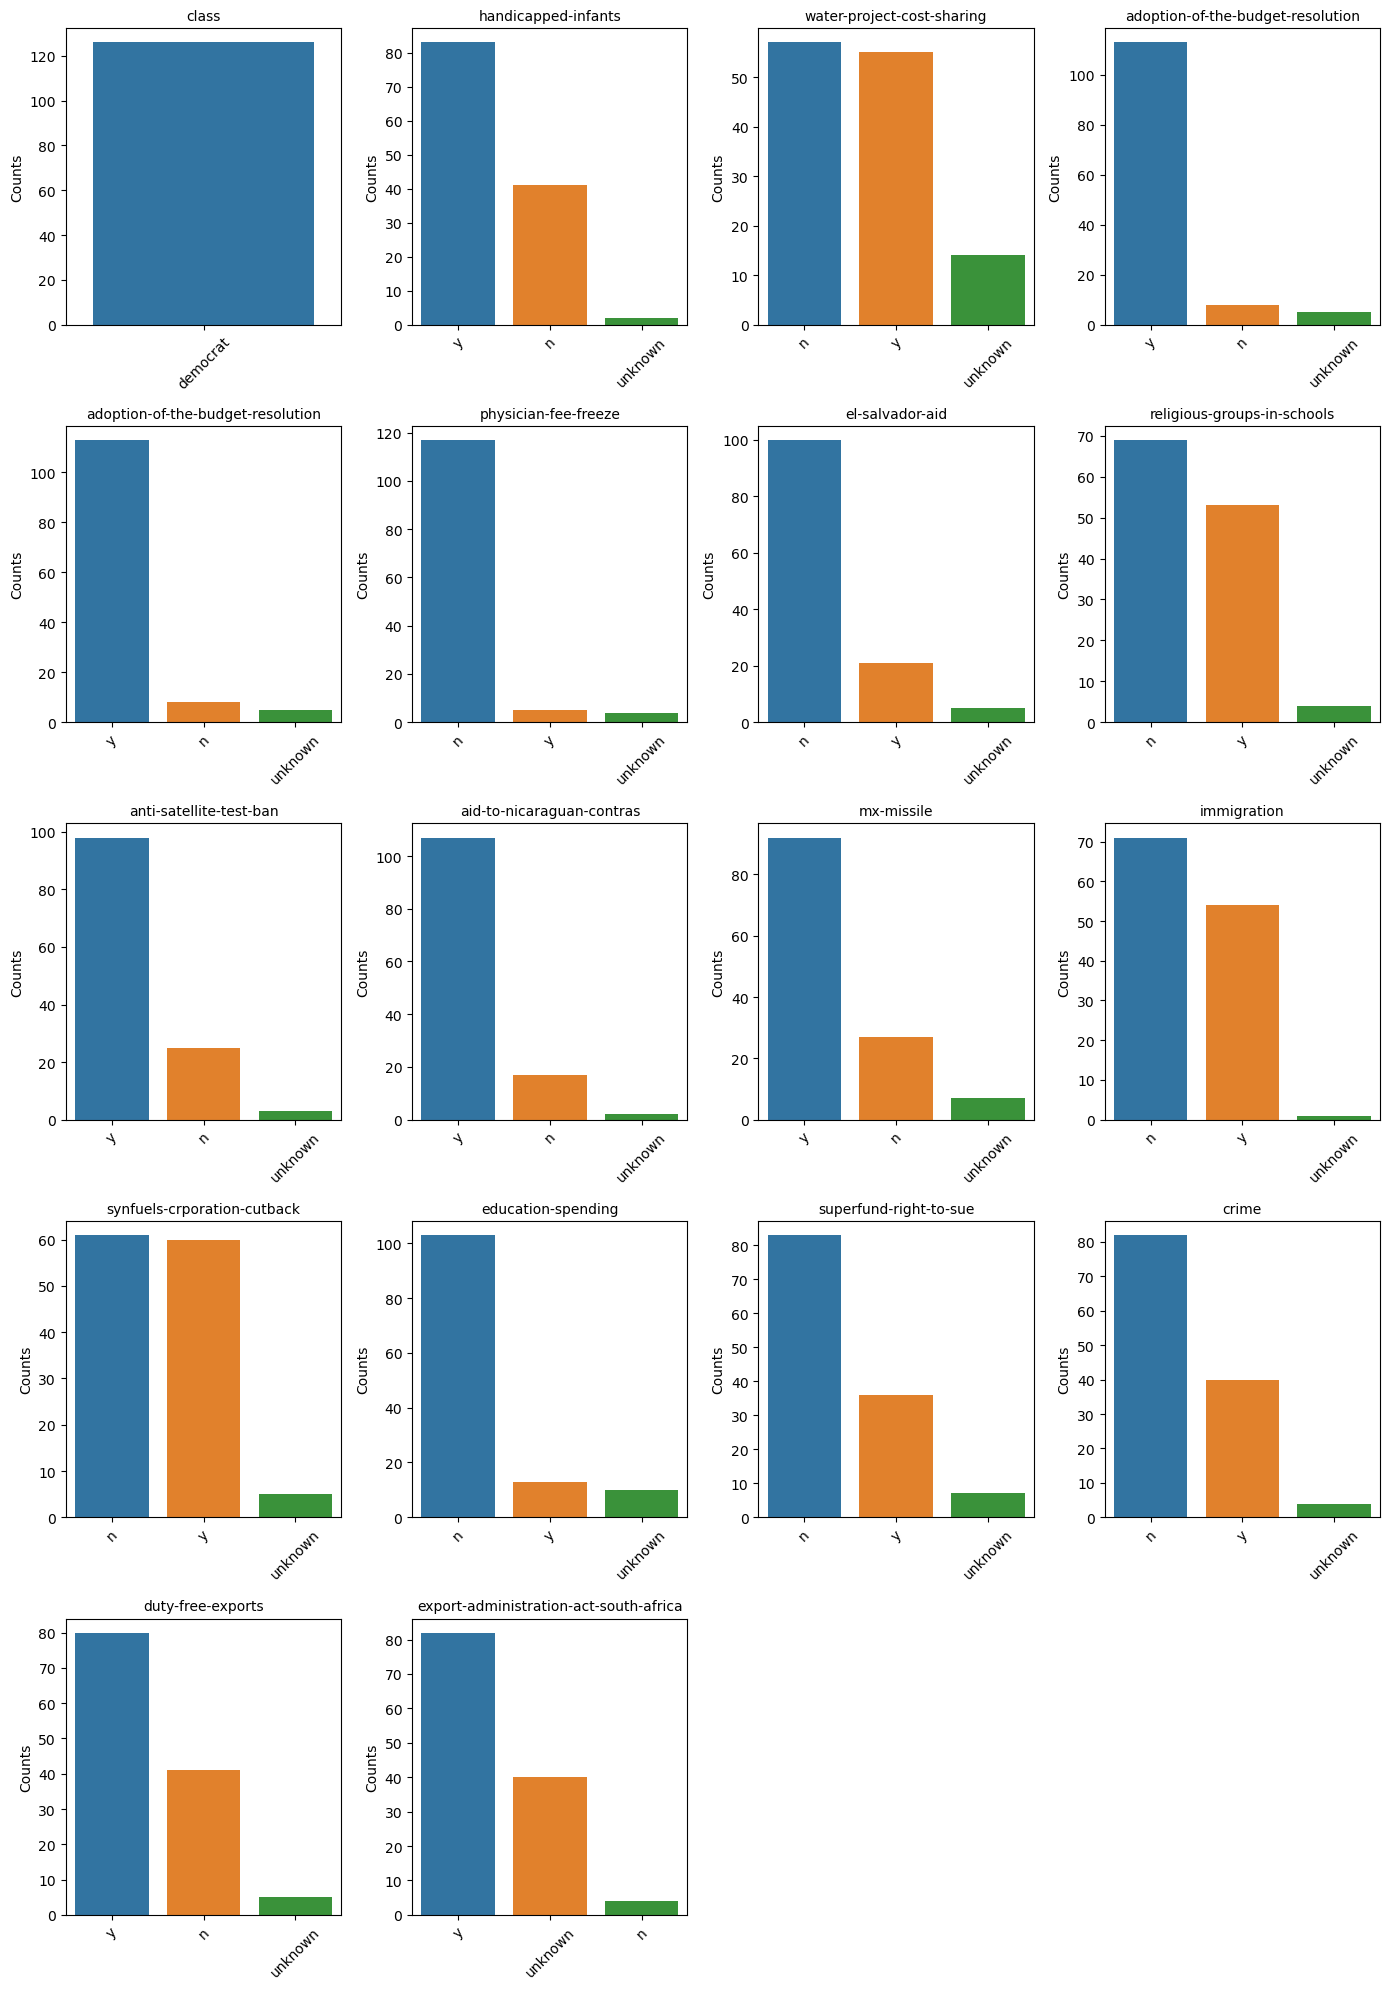

In [390]:
plot_categorical_distributions(voting_train[voting_train['class'] == 'democrat'], categorical_columns)

## Democrates: Inspect the feature distribution within the democrates


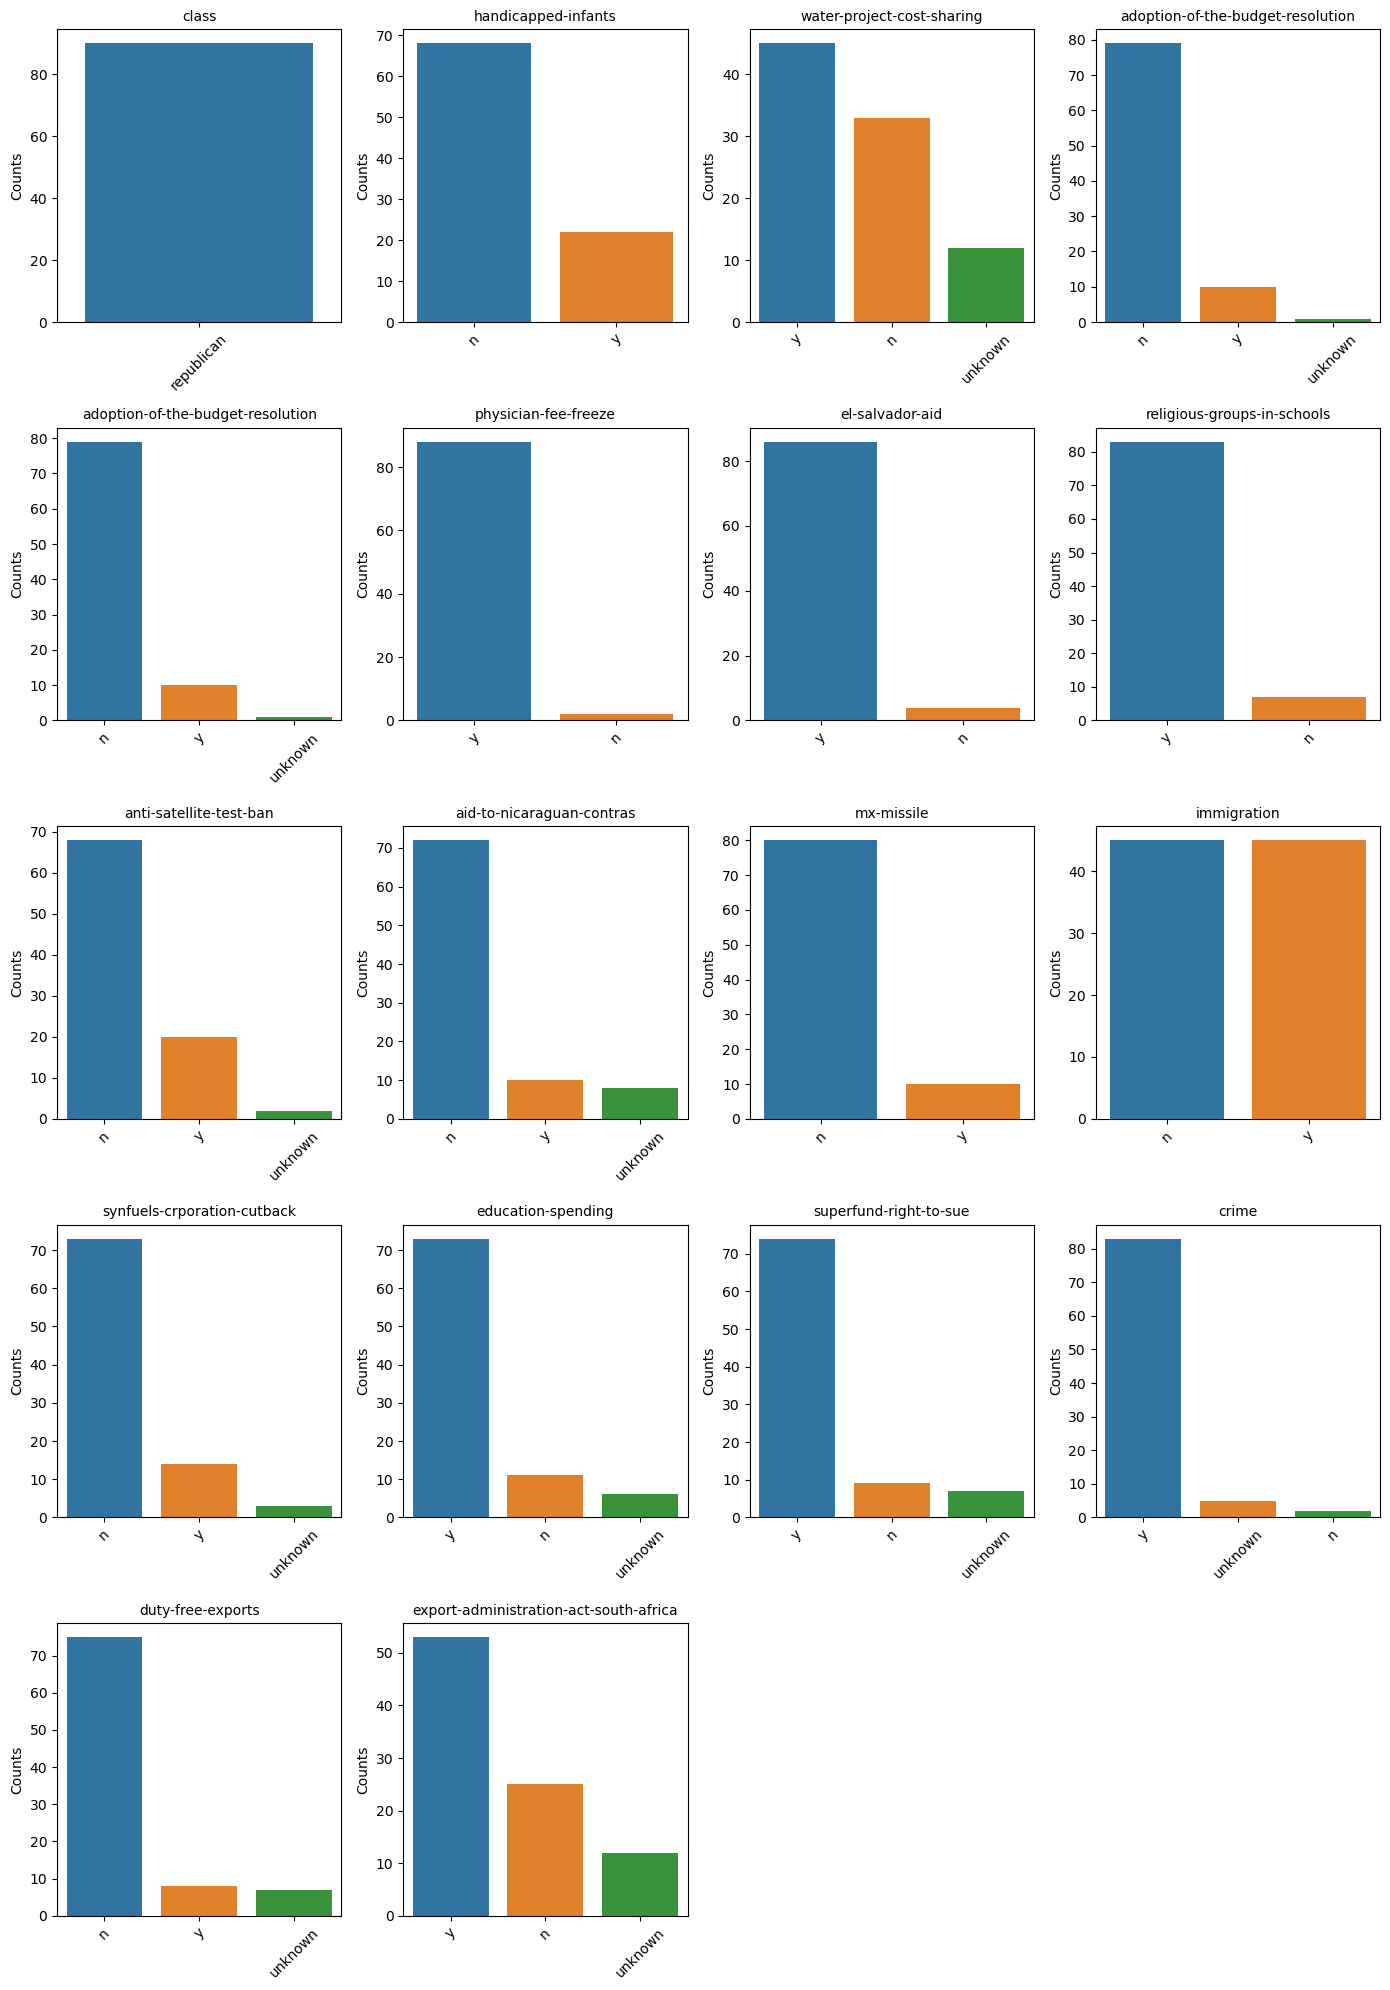

In [391]:
plot_categorical_distributions(voting_train[voting_train['class'] != 'democrat'], categorical_columns)

## Preprocessing

We use One hot encoding for the binary values. It would also make sense to map them to 0 and 1m, but we have to deal with the "missing values" (unknown values). The encoding results in two new column. One Column_Yes and the orther one Column_No. In the case that an unknown value occur, we simply add 0 to both of the new columns. With that approach the missing values wont bais our classifier. 

In [392]:
vote_train_encoded = one_hot_encode_columns(voting_train, 'class')

In [393]:
vote_train_encoded.head(5)

,class,handicapped-infants_Yes,handicapped-infants_No,water-project-cost-sharing_Yes,water-project-cost-sharing_No,adoption-of-the-budget-resolution_Yes,adoption-of-the-budget-resolution_No,physician-fee-freeze_Yes,physician-fee-freeze_No,el-salvador-aid_Yes,...,education-spending_Yes,education-spending_No,superfund-right-to-sue_Yes,superfund-right-to-sue_No,crime_Yes,crime_No,duty-free-exports_Yes,duty-free-exports_No,export-administration-act-south-africa_Yes,export-administration-act-south-africa_No
0,democrat,1,0,0,1,1,0,0,1,1,...,0,1,1,0,1,0,0,1,0,0
1,democrat,0,1,0,1,1,0,0,1,1,...,1,0,1,0,1,0,0,1,1,0
2,democrat,1,0,0,1,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,0
3,republican,0,1,0,1,0,1,1,0,1,...,1,0,0,1,1,0,0,0,1,0
4,democrat,1,0,1,0,1,0,0,1,0,...,0,1,1,0,0,1,1,0,1,0


## Model

**Prepare Test set**

We transformed the traing set a bit, so we need to transfrom the test set in excatly the same way. The model expect encoded columns!



In [394]:
voting_test

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
1,n,n,y,n,n,y,y,y,y,y,y,n,n,n,unknown,y
2,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n
3,y,n,y,n,n,n,y,y,y,y,y,n,y,n,y,y
4,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,y,n,y,n,n,unknown,y,y,y,n,unknown,unknown,n,unknown,unknown,unknown
212,unknown,unknown,y,n,n,n,y,y,y,unknown,unknown,n,n,n,unknown,unknown
213,n,n,y,n,n,y,unknown,y,unknown,y,y,y,n,y,y,unknown
215,y,n,y,n,n,y,n,y,unknown,y,y,y,unknown,n,n,y


In [395]:
#encoded_test_data = one_hot_encode_columns(voting_test, 'class')

#X_test = encoded_test_data

### Function for different ML models



<img src="ml_map.png" alt="Image Title" style="width: 800px;"/>

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



def compare_methods(X_train, X_valid, y_train, y_valid, classifier_List):
    scores = {}

    for name, classifier in classifier_List.items():
        
        # Cross-Validation
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=10)

        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_valid)
        
        # plot Matrix and table 
        #evaluate_model(y_test, predictions)
        
        scores[name] = {
            "cross_val_scores": cv_scores.mean(),
            "test_accuracy": accuracy_score(y_valid, predictions),
            "precision": precision_score(y_valid, predictions, average='weighted'),
            "recall": recall_score(y_valid, predictions, average='weighted'),
            "f1_score": f1_score(y_valid, predictions, average='weighted')
        }
        
    return scores

# Set of classifier to be used
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(),
    "Linear SVC": LinearSVC() #,
    #"MLP Classifier": MLPClassifier() # it dont work for any reason
    }


## Model with encoded data

In [397]:
X_temp = vote_train_encoded.drop('class', axis=1)
y_temp = vote_train_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


scores_encoded = compare_methods(X_train, X_test, y_train, y_test, classifier_List=classifiers)
df_scores = pd.DataFrame(scores_encoded).T # transfrom into df 

(df_scores.sort_values(by='test_accuracy', ascending=False))

,cross_val_scores,test_accuracy,precision,recall,f1_score
Logistic Regression,0.953333,0.969231,0.969231,0.969231,0.969231
Support Vector Classifier,0.960000,0.969231,0.969231,0.969231,0.969231
Gaussian Naive Bayes,0.953333,0.969231,0.969231,0.969231,0.969231
Decision Tree Classifier,0.947083,0.953846,0.954529,0.953846,0.953958
Random Forest Classifier,0.973333,0.953846,0.954529,0.953846,0.953958
AdaBoost Classifier,0.946667,0.953846,0.954529,0.953846,0.953958
Perceptron,0.953750,0.953846,0.954529,0.953846,0.953958
Linear SVC,0.953333,0.953846,0.954529,0.953846,0.953958
K-Nearest Neighbors,0.933333,0.938462,0.940790,0.938462,0.938729
Gradient Boosting Classifier,0.960000,0.938462,0.940790,0.938462,0.938729


The best classifiers on test data are Logistic Regression, Support Vector Classifier, Gaussian Naive Bayes and Random Forest Classifier. They seem promising for further evaluation.

But in total they all perform very well. 

## Modelling with drop NA
We will try another way to deal with the 'missing values' in the data set. Now, we simmply drop out every colum including missing values. 

That approach will shirnk our data set and make the classifier potential more unstable. But it could reduce the bias.

In [398]:
train_cp = voting_train.copy(deep=True)

train_cp.replace({'y': 1, 'n': 0}, inplace=True)
train_cp.replace({'democrat': 1, 'republican': 0}, inplace=True)
train_cp.replace('unknown', np.nan, inplace=True)
train_cp.dropna(inplace=True)

print("Shape before smapling: " + str(train_cp.shape))
display(train_cp.head(2))

Shape before smapling: (115, 17)


,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
1,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
6,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [399]:
X_train, X_test, y_train, y_test = train_test_split(train_cp.drop('class', axis=1), train_cp['class'], test_size=0.3, random_state=42)

scores_no_na = compare_methods(X_train, X_test, y_train, y_test, classifier_List=classifiers)

df_scores = pd.DataFrame(scores_no_na).T
(df_scores.sort_values(by='test_accuracy', ascending=False))

,cross_val_scores,test_accuracy,precision,recall,f1_score
AdaBoost Classifier,0.9500,0.971429,0.972932,0.971429,0.971382
Decision Tree Classifier,0.9375,0.942857,0.948571,0.942857,0.942575
Gradient Boosting Classifier,0.9500,0.942857,0.948571,0.942857,0.942575
Gaussian Naive Bayes,0.9625,0.942857,0.948571,0.942857,0.942575
Perceptron,0.9500,0.942857,0.948571,0.942857,0.942575
Linear SVC,0.9375,0.942857,0.948571,0.942857,0.942575
Support Vector Classifier,0.9625,0.914286,0.926531,0.914286,0.913435
Random Forest Classifier,0.9750,0.914286,0.926531,0.914286,0.913435
Logistic Regression,0.9375,0.885714,0.906494,0.885714,0.883810
K-Nearest Neighbors,0.9375,0.857143,0.867347,0.857143,0.855725


With the smaller dataframe the best classifier are AdaBoost Classifier. It is actually better then in the model before. But we shoould be careful with that results since the test set is very small. 

## Modelling with balancing
From the plot below we can see that the target class is a bit inbalanced. That could influence our classifier and the classifier could tend to predict the majority class. 

It is depending on the prediciton goal, if its more important to identify all the democrats correctly by tolerating that also some repuplicans are classified as democrats. That goal would optimize an higher Recall!

If we want to estimate the democrats more conservetive, that means we want to be sure that in our prediction are only democrats we maximize a higher precision. In that case we tolerate that some democrats are missclassified as democrats but we minimize that republicans are classfied as democrats!


<Axes: >

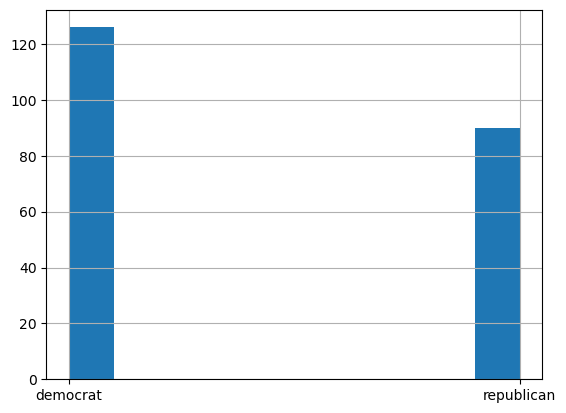

In [400]:
voting_train["class"].hist()

In [401]:
from sklearn.utils import resample

train_df, test_df = train_test_split(voting_train, test_size=0.3, random_state=123, stratify=voting_train['class'])

df_majority = train_df[train_df['class'] == train_df['class'].value_counts().idxmax()]
df_minority = train_df[train_df['class'] != train_df['class'].value_counts().idxmax()]

majority_count = train_df['class'].value_counts().max()

# Downsampling
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples=train_df['class'].value_counts().min(), 
                                   random_state=123)

# Upsampling
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=majority_count, 
                                 random_state=123) 

# Merging
df_balanced_down = pd.concat([df_majority_downsampled, df_minority])
df_balanced_up = pd.concat([df_majority, df_minority_upsampled])

print("Downsampling:")
print(df_balanced_down['class'].value_counts())
print("\n")
print("Upsampling:")
print(df_balanced_up['class'].value_counts())

Downsampling:
class
democrat      63
republican    63
Name: count, dtype: int64


Upsampling:
class
democrat      88
republican    88
Name: count, dtype: int64


In [402]:
def encoding_train_and_test(df_train, df_test):
    encoded_balanced_train = one_hot_encode_columns(df_train, 'class')
    test_encoded = one_hot_encode_columns(df_test, 'class')

    return encoded_balanced_train, test_encoded


vote_train_encoded_balanced, vote_test_encoded = encoding_train_and_test(df_balanced_down, test_df)

In [403]:
print(vote_train_encoded_balanced.shape)
print(vote_test_encoded.shape)

(126, 33)
(65, 33)


<Axes: >

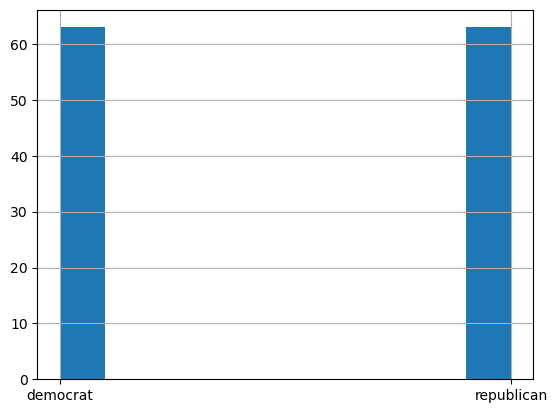

In [404]:
## Build models

vote_train_encoded_balanced["class"].hist()
#vote_test_encoded["class"].hist()


In [405]:
y_test = vote_test_encoded["class"]
y_train = vote_train_encoded_balanced['class']

X_train = vote_train_encoded_balanced.drop('class', axis=1)
X_test = vote_test_encoded.drop("class", axis=1)


scores_up_sampled = compare_methods(X_train, X_test, y_train, y_test, classifier_List=classifiers)

df_scores = pd.DataFrame(scores_up_sampled).T

df_scores.sort_values(by='test_accuracy', ascending=False)

,cross_val_scores,test_accuracy,precision,recall,f1_score
Decision Tree Classifier,0.919872,1.000000,1.000000,1.000000,1.000000
Perceptron,0.921154,1.000000,1.000000,1.000000,1.000000
Logistic Regression,0.936538,0.984615,0.985165,0.984615,0.984653
Support Vector Classifier,0.945513,0.984615,0.985165,0.984615,0.984653
Random Forest Classifier,0.936538,0.984615,0.985165,0.984615,0.984653
K-Nearest Neighbors,0.914103,0.969231,0.971353,0.969231,0.969364
Gradient Boosting Classifier,0.928846,0.969231,0.970769,0.969231,0.969034
AdaBoost Classifier,0.937179,0.969231,0.970769,0.969231,0.969034
Linear SVC,0.929487,0.969231,0.970769,0.969231,0.969034
Gaussian Naive Bayes,0.905128,0.953846,0.954043,0.953846,0.953710


100% accuracy seems very unlikely! Maybe there are duplicates in the train and test dataset? Soemthing else is very suspicious.

# Useful functions

In [406]:
def col_ranges_and_types(df):
    
    feature_types = df.dtypes
    
    feature_details = []
    
    for feature in df.columns:

        # categorical column 
        if feature_types[feature] == 'object':
            details = df[feature].dropna().unique().tolist()

        # Numeric column
        else:
            details = (df[feature].min(), df[feature].max())
        
        # Append feature name, range and data type 
        feature_details.append({
            'Feature': feature,
            'Value Range / Possible Values': details,
            'Data Type': feature_types[feature]
        })
    
    return pd.DataFrame(feature_details)



In [407]:
def plot_categorical_distributions(df, categorical_columns):
    
    
    n_cols = 4  #  columns in the grid 
    n_rows = int(np.ceil(len(categorical_columns) / n_cols))  

    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
    
    # Flatten axes array for iterating
    axes = axes.flatten()
    
    #create a bar plot for each one
    for ax, col in zip(axes, categorical_columns):
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Counts')
        for item in ax.get_xticklabels(): 
            item.set_rotation(45) # rotate x ticks
        
    # Remove any unused plots
    for ax in axes[len(categorical_columns):]:
        ax.remove()


    
    
    plt.tight_layout()
    plt.show()

In [408]:
def one_hot_encode_columns(df, target_column):

    result_df = df.copy()

    
    for column in df.columns:
        if column != target_column:
            
            # Create two new columns 
            result_df[column + '_Yes'] = (df[column] == 'y').astype(int)
            result_df[column + '_No'] = (df[column] == 'n').astype(int)
            
            # Drop original column
            result_df.drop(column, axis=1, inplace=True)

    return result_df



In [409]:
def plot_confusion_matrix(cm, class_name):
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for Class: {class_name}")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()


In [410]:
def evaluate_model(y_test, y_pred):
    # confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # classification report
    print(classification_report(y_test, y_pred))
    print(conf_matrix)

In [411]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


def fit_pipeline(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    scaler_class:type, 
                    metric_func:type):

    score = 0.0
    scaler = scaler_class()
    
    # sklearn pipeline
    pipeline = Pipeline([
    ("scaler", scaler),  # kind of scaling
    ("regressor", model_class())  
    ])
 
    # train pipeline
    pipeline.fit(X_train, y_train) 
    
    # predict
    predictions = pipeline.predict(X_valid)
    
    # calculate the performance
    score = metric_func(y_valid, predictions) 


def compare_scaling(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    metric_func: type):

    scores = {}
    
    model = model_class()
    model.fit(X_train, y_train)
    
    #pred
    pred = model.predict(X_valid)
    score_unscaled = metric_func(y_valid, pred)
    

    # with pipline (scaling)
    score_pip = fit_pipeline(
                            X_train = X_train, 
                            y_train = y_train, 
                            X_valid = X_valid, 
                            y_valid = y_valid, 
                            model_class = model_class, 
                            scaler_class = StandardScaler, # 
                            metric_func = metric_func
                            )

    scores["unscaled_score"] = score_unscaled
    scores["scaled_score"] = score_pip


    return scores